In [1]:
import numpy as np
import pandas as pd

def load_word_weights(path):
    """
    Reads a file whose contents look like
      'anymore': 0.0035, 'similar': 0.0047, 'potential': 0.0037, ...
    (possibly all on one line),
    and returns a dict {word: weight}.
    """
    text = open(path, "r", encoding="utf-8").read()
    # Split on commas to get each "'word': weight" piece
    pieces = [p.strip() for p in text.split(",") if p.strip()]
    
    out = {}
    for piece in pieces:
        # Remove any surrounding quotes and whitespace
        # Then split on ':' to separate word from weight
        if ":" not in piece:
            continue
        w, val = piece.split(":", 1)
        w = w.strip().strip("'\"")        # strip spaces and quotes
        weight = float(val.strip())       # parse the number
        out[w] = weight
    return out

def bin_word_weights_dict(word_weights, num_bins=10):
    """
    Takes dict {word: weight} and bins the weights into
    `num_bins` equal-width intervals, returning a DataFrame
    with columns ['bin_min','bin_max','count','avg_weight'].
    """
    weights = np.array(list(word_weights.values()), dtype=float)
    wmin, wmax = weights.min(), weights.max()
    bins = np.linspace(wmin, wmax, num_bins + 1)
    
    idx = np.digitize(weights, bins) - 1
    idx = np.clip(idx, 0, num_bins - 1)
    
    counts = np.bincount(idx, minlength=num_bins)
    avg_wts = [
        weights[idx == k].mean() if counts[k] > 0 else np.nan
        for k in range(num_bins)
    ]
    
    ranges = [(bins[i], bins[i+1]) for i in range(num_bins)]
    df = pd.DataFrame({
        'bin_min':    [low for low, _ in ranges],
        'bin_max':    [high for _, high in ranges],
        'count':      counts,
        'avg_weight': avg_wts
    })
    return df

# === Usage ===
word_weights = load_word_weights("variance copy.csv")
df_bins = bin_word_weights_dict(word_weights, num_bins=50)

# Print all bins, including empty ones:
for col in df_bins.columns:
    print(f"Column: {col}")
    print(df_bins[col].to_list())
    print()  # blank line for separation



Column: bin_min
[0.0, 0.0014000000000000002, 0.0028000000000000004, 0.004200000000000001, 0.005600000000000001, 0.007000000000000001, 0.008400000000000001, 0.009800000000000001, 0.011200000000000002, 0.012600000000000002, 0.014000000000000002, 0.015400000000000002, 0.016800000000000002, 0.0182, 0.019600000000000003, 0.021000000000000005, 0.022400000000000003, 0.0238, 0.025200000000000004, 0.026600000000000006, 0.028000000000000004, 0.029400000000000003, 0.030800000000000004, 0.032200000000000006, 0.033600000000000005, 0.035, 0.0364, 0.03780000000000001, 0.039200000000000006, 0.040600000000000004, 0.04200000000000001, 0.04340000000000001, 0.044800000000000006, 0.046200000000000005, 0.0476, 0.04900000000000001, 0.05040000000000001, 0.051800000000000006, 0.05320000000000001, 0.05460000000000001, 0.05600000000000001, 0.05740000000000001, 0.058800000000000005, 0.06020000000000001, 0.06160000000000001, 0.06300000000000001, 0.06440000000000001, 0.06580000000000001, 0.06720000000000001, 0.0686

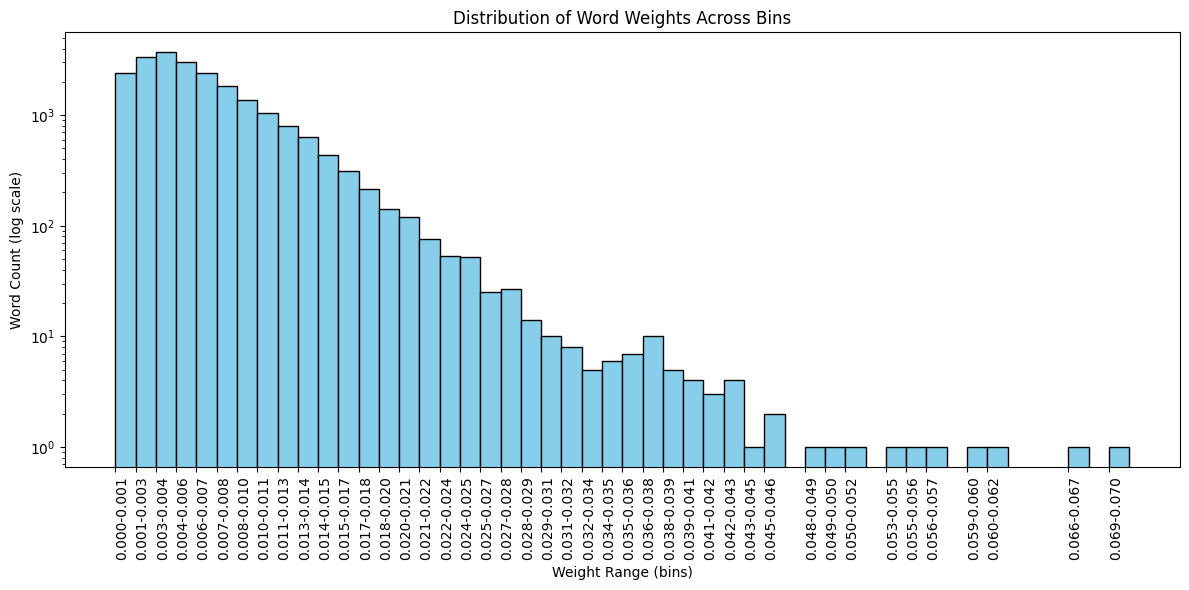

Binary Ranges: [(0.0, 0.0014000000000000002), (0.0014000000000000002, 0.0028000000000000004), (0.0028000000000000004, 0.004200000000000001), (0.004200000000000001, 0.005600000000000001), (0.005600000000000001, 0.007000000000000001), (0.007000000000000001, 0.008400000000000001), (0.008400000000000001, 0.009800000000000001), (0.009800000000000001, 0.011200000000000002), (0.011200000000000002, 0.012600000000000002), (0.012600000000000002, 0.014000000000000002), (0.014000000000000002, 0.015400000000000002), (0.015400000000000002, 0.016800000000000002), (0.016800000000000002, 0.0182), (0.0182, 0.019600000000000003), (0.019600000000000003, 0.021000000000000005), (0.021000000000000005, 0.022400000000000003), (0.022400000000000003, 0.0238), (0.0238, 0.025200000000000004), (0.025200000000000004, 0.026600000000000006), (0.026600000000000006, 0.028000000000000004), (0.028000000000000004, 0.029400000000000003), (0.029400000000000003, 0.030800000000000004), (0.030800000000000004, 0.0322000000000000

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Provided bin data
data = {
    'bin_min': [0.0, 0.0014000000000000002, 0.0028000000000000004, 0.004200000000000001, 0.005600000000000001, 0.007000000000000001, 0.008400000000000001, 0.009800000000000001, 0.011200000000000002, 0.012600000000000002, 0.014000000000000002, 0.015400000000000002, 0.016800000000000002, 0.0182, 0.019600000000000003, 0.021000000000000005, 0.022400000000000003, 0.0238, 0.025200000000000004, 0.026600000000000006, 0.028000000000000004, 0.029400000000000003, 0.030800000000000004, 0.032200000000000006, 0.033600000000000005, 0.035, 0.0364, 0.03780000000000001, 0.039200000000000006, 0.040600000000000004, 0.04200000000000001, 0.04340000000000001, 0.044800000000000006, 0.046200000000000005, 0.0476, 0.04900000000000001, 0.05040000000000001, 0.051800000000000006, 0.05320000000000001, 0.05460000000000001, 0.05600000000000001, 0.05740000000000001, 0.058800000000000005, 0.06020000000000001, 0.06160000000000001, 0.06300000000000001, 0.06440000000000001, 0.06580000000000001, 0.06720000000000001, 0.06860000000000001]
,
    'bin_max': [0.0014000000000000002, 0.0028000000000000004, 0.004200000000000001, 0.005600000000000001, 0.007000000000000001, 0.008400000000000001, 0.009800000000000001, 0.011200000000000002, 0.012600000000000002, 0.014000000000000002, 0.015400000000000002, 0.016800000000000002, 0.0182, 0.019600000000000003, 0.021000000000000005, 0.022400000000000003, 0.0238, 0.025200000000000004, 0.026600000000000006, 0.028000000000000004, 0.029400000000000003, 0.030800000000000004, 0.032200000000000006, 0.033600000000000005, 0.035, 0.0364, 0.03780000000000001, 0.039200000000000006, 0.040600000000000004, 0.04200000000000001, 0.04340000000000001, 0.044800000000000006, 0.046200000000000005, 0.0476, 0.04900000000000001, 0.05040000000000001, 0.051800000000000006, 0.05320000000000001, 0.05460000000000001, 0.05600000000000001, 0.05740000000000001, 0.058800000000000005, 0.06020000000000001, 0.06160000000000001, 0.06300000000000001, 0.06440000000000001, 0.06580000000000001, 0.06720000000000001, 0.06860000000000001, 0.07]
,
    'count': [2429, 3375, 3718, 3051, 2410, 1852, 1360, 1047, 792, 639, 440, 314, 215, 142, 120, 76, 53, 52, 25, 27, 14, 10, 8, 5, 6, 7, 10, 5, 4, 3, 4, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1]
,
    'avg_weight': [0.0007652120214079869, 0.002189037037037037, 0.0035371705217859062, 0.004923533267781055, 0.006320995850622407, 0.007711771058315334, 0.009129852941176471, 0.010499904489016238, 0.011913131313131311, 0.01330641627543036, 0.014712727272727273, 0.016137579617834394, 0.01748604651162791, 0.018875352112676054, 0.02027, 0.02186184210526316, 0.023030188679245278, 0.02440384615384615, 0.026015999999999997, 0.027303703703703705, 0.028742857142857143, 0.029919999999999995, 0.0315, 0.032819999999999995, 0.03441666666666667, 0.03554285714285715, 0.03685, 0.03818, 0.0402, 0.04143333333333333, 0.0426, 0.0448, 0.0456, np.nan, 0.0478, 0.0497, 0.0508, np.nan, 0.0539, 0.0556, 0.0564, np.nan, 0.059, 0.061, np.nan, np.nan, np.nan, 0.0663, np.nan, 0.07]

}

df = pd.DataFrame(data)

# Filter out rows with count == 0
df_filtered = df[df["count"] > 0].copy()

# Compute bar edges and widths
bar_lefts = df_filtered["bin_min"]
bar_widths = df_filtered["bin_max"] - df_filtered["bin_min"]
bar_counts = df_filtered["count"]

# Plot with proper alignment
plt.figure(figsize=(12, 6))
plt.bar(bar_lefts, bar_counts, width=bar_widths, align='edge', log=True,
        color="skyblue", edgecolor="black")

# Set x-ticks at left edges
tick_positions = bar_lefts
tick_labels = [f"{low:.3f}-{high:.3f}" for low, high in zip(df_filtered["bin_min"], df_filtered["bin_max"])]
plt.xticks(tick_positions, tick_labels, rotation=90, ha="left")

plt.xlabel("Weight Range (bins)")
plt.ylabel("Word Count (log scale)")
plt.title("Distribution of Word Weights Across Bins")
plt.tight_layout()
plt.show()
binary_ranges = list(zip(df_filtered["bin_min"], df_filtered["bin_max"]))
print("Binary Ranges:", binary_ranges)

# Chart NN distribution

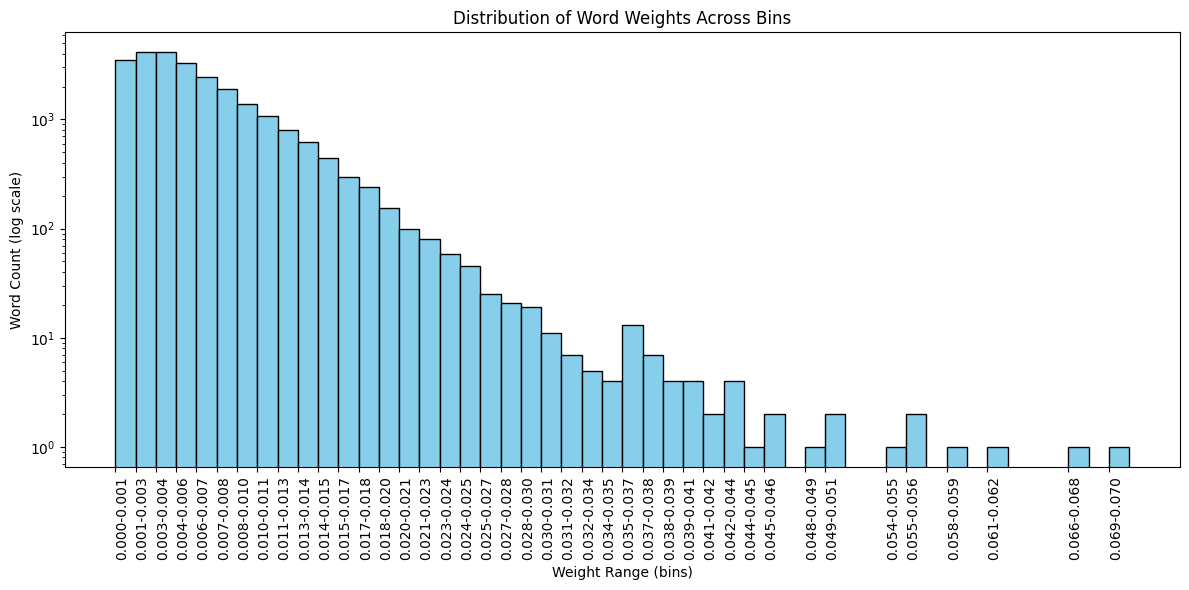

Binary Ranges: [(0.0, 0.0014080000000000002), (0.0014080000000000002, 0.0028160000000000004), (0.0028160000000000004, 0.004224), (0.004224, 0.005632000000000001), (0.005632000000000001, 0.007040000000000001), (0.007040000000000001, 0.008448), (0.008448, 0.009856000000000002), (0.009856000000000002, 0.011264000000000001), (0.011264000000000001, 0.012672000000000001), (0.012672000000000001, 0.014080000000000002), (0.014080000000000002, 0.015488000000000002), (0.015488000000000002, 0.016896), (0.016896, 0.018304), (0.018304, 0.019712000000000004), (0.019712000000000004, 0.021120000000000003), (0.021120000000000003, 0.022528000000000003), (0.022528000000000003, 0.023936000000000002), (0.023936000000000002, 0.025344000000000002), (0.025344000000000002, 0.026752000000000005), (0.026752000000000005, 0.028160000000000004), (0.028160000000000004, 0.029568000000000004), (0.029568000000000004, 0.030976000000000004), (0.030976000000000004, 0.032384), (0.032384, 0.033792), (0.033792, 0.0352), (0.03

## I first calculate the variance, then notice the units become microscopical, and move on to using standard deviation


In [15]:
import csv
import numpy as np

# 1. Load a dictionary of word: weight from a CSV
def load_word_weight_dict(file_path):
    """
    Reads a CSV file where each line is formatted as:
      word: weight, word:weight, ...
    and returns a dictionary mapping word -> float(weight).
    """
    word_weights = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            pairs = [pair.strip() for pair in line.strip().split(',') if pair.strip()]
            for pair in pairs:
                if ':' not in pair:
                    continue
                word, weight = pair.split(':', 1)
                word = word.strip().strip("'\"")
                try:
                    w = float(weight.strip())
                except ValueError:
                    continue
                word_weights[word] = w
    return word_weights

# 2. Compute the variance of each word across base + others
def compute_word_variances(base_dict, other_dicts):
    """
    For each word in base_dict, collects its weights across [base_dict] + other_dicts,
    computes variance, and returns a dict: word -> variance.
    """
    variances = {}
    for word, base_w in base_dict.items():
        weights = [base_w] + [d.get(word, 0.0) for d in other_dicts]
        var = float(np.var(weights, ddof=0))  # population variance
        variances[word] = var
    return variances

# 3. Define the numeric bins as (low, high) ranges
# Binary ranges of the NN
# bin_ranges = [
#     (0.000, 0.005),
#     (0.00500000000000000000000001, 0.009),
#     (0.00900000000000000000000001, 0.014),
#     (0.01400000000000000000000001, 0.019),
#     (0.01900000000000000000000001, 0.024),
#     (0.02400000000000000000000001, 0.028),
#     (0.02800000000000000000000001, 0.033),
#     (0.03300000000000000000000001, 0.038),
#     (0.03800000000000000000000001, 0.043),
#     (0.04300000000000000000000001, 0.047),
#     (0.057, 0.061),
#     (0.06100000000000000000000001, 0.066),
#     (0.06600000000000000000000001, 0.071),
#     (0.07100000000000000000000001, 0.076),
#     (0.07600000000000000000000001, 0.080),
#     (0.08000000000000000000000001, 0.085),
#     (0.090, 0.094),
#     (0.09400000000000000000000001, 0.099),
#     (0.09900000000000000000000001, 0.104),
#     (0.137, 0.142),
#     (0.189, 0.194),
#     (0.231, 0.236),
# ]

#Binary ranges of the CQNN

#bin_ranges = [(0.0, 0.0014000000000000002), (0.0014000000000000002, 0.0028000000000000004), (0.0028000000000000004, 0.004200000000000001), (0.004200000000000001, 0.005600000000000001), (0.005600000000000001, 0.007000000000000001), (0.007000000000000001, 0.008400000000000001), (0.008400000000000001, 0.009800000000000001), (0.009800000000000001, 0.011200000000000002), (0.011200000000000002, 0.012600000000000002), (0.012600000000000002, 0.014000000000000002), (0.014000000000000002, 0.015400000000000002), (0.015400000000000002, 0.016800000000000002), (0.016800000000000002, 0.0182), (0.0182, 0.019600000000000003), (0.019600000000000003, 0.021000000000000005), (0.021000000000000005, 0.022400000000000003), (0.022400000000000003, 0.0238), (0.0238, 0.025200000000000004), (0.025200000000000004, 0.026600000000000006), (0.026600000000000006, 0.028000000000000004), (0.028000000000000004, 0.029400000000000003), (0.029400000000000003, 0.030800000000000004), (0.030800000000000004, 0.032200000000000006), (0.032200000000000006, 0.033600000000000005), (0.033600000000000005, 0.035), (0.035, 0.0364), (0.0364, 0.03780000000000001), (0.03780000000000001, 0.039200000000000006), (0.039200000000000006, 0.040600000000000004), (0.040600000000000004, 0.04200000000000001), (0.04200000000000001, 0.04340000000000001), (0.04340000000000001, 0.044800000000000006), (0.044800000000000006, 0.046200000000000005), (0.0476, 0.04900000000000001), (0.04900000000000001, 0.05040000000000001), (0.05040000000000001, 0.051800000000000006), (0.05320000000000001, 0.05460000000000001), (0.05460000000000001, 0.05600000000000001), (0.05600000000000001, 0.05740000000000001), (0.058800000000000005, 0.06020000000000001), (0.06020000000000001, 0.06160000000000001), (0.06580000000000001, 0.06720000000000001), (0.06860000000000001, 0.07)]

bin_ranges = bin_ranges = [
    (0.0, 0.0014),
    (0.0014, 0.0028),
    (0.0028, 0.0042),
    (0.0042, 0.0056),
    (0.0056, 0.0070),
    (0.0070, 0.0084),
    (0.0084, 0.0098),
    (0.0098, 0.0112),
    (0.0112, 0.0126),
    (0.0126, 0.0140),
    (0.0140, 0.0154),
    (0.0154, 0.0168),
    (0.0168, 0.0182),
    (0.0182, 0.0196),
    (0.0196, 0.0210),
    (0.0210, 0.0224),
    (0.0224, 0.0238),
    (0.0238, 0.0252),
    (0.0252, 0.0266),
    (0.0266, 0.0280),
    (0.0280, 0.0294),
    (0.0294, 0.0308),
    (0.0308, 0.0322),
    (0.0322, 0.0336),
    (0.0336, 0.0350),
    (0.0350, 0.0364),
    (0.0364, 0.0378),
    (0.0378, 0.0392),
    (0.0392, 0.0406),
    (0.0406, 0.0420),
    (0.0420, 0.0434),
    (0.0434, 0.0448),
    (0.0448, 0.0462),
    (0.0462, 0.0476),
    (0.0476, 0.0490),
    (0.0490, 0.0504),
    (0.0504, 0.0518),
    (0.0518, 0.0532),
    (0.0532, 0.0546),
    (0.0546, 0.0560),
    (0.0560, 0.0574),
    (0.0574, 0.0588),
    (0.0588, 0.0602),
    (0.0602, 0.0616),
    (0.0616, 0.0630),
    (0.0630, 0.0644),
    (0.0644, 0.0658),
    (0.0658, 0.0672),
    (0.0672, 0.0686)
]

# 4. Compute average variance for each bin
def compute_avg_bin_variances(base_dict, other_dicts, bin_ranges):
    word_variances = compute_word_variances(base_dict, other_dicts)
    bin_avg_variances = {}

    for low, high in bin_ranges:
        label = f"{low:.3f}-{high:.3f}"
        words_in_bin = [w for w, v in base_dict.items() if low <= v <= high]

        if not words_in_bin:
            bin_avg_variances[label] = 0.0
        else:
            bin_vars = [word_variances[w] for w in words_in_bin]
            bin_avg_variances[label] = float(np.mean(bin_vars))

    return bin_avg_variances

# 5. Run the computation
base = load_word_weight_dict("variance_QCNN.csv")
others = [load_word_weight_dict(f"var{i}_QCNN.csv") for i in range(2, 6)]

bin_avg_variances = compute_avg_bin_variances(base, others, bin_ranges)

std_devs = []

for avg_var in bin_avg_variances.values():
    std_dev = avg_var ** 0.5
    std_devs.append(std_dev)

print(std_devs)




[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0018605375567292376, 0.0, 0.0, 0.009342719090286297, 0.005551720454057461, 0.004227718060609056, 0.003179056463795508, 0.0032914434523473126, 0.00667337995321711, 0.006659429404986587, 0.009455453452902194, 0.006088480927127883, 0.011963444320094442, 0.004493728963789426, 0.0, 0.006657783414921215, 0.006387592138931018, 0.0027539547321382505, 0.006018737409124941, 0.004395452195167182, 0.009613844184300056, 0.0, 0.007724005869150195, 0.004663689526544407, 0.008183153426399874, 0.00717244728108893, 0.004242326405798278, 0.005993930263191257, 0.008828463059898931, 0.01943164429480943, 0.01817469302812751, 0.00355501523672309, 0.004895222160433577, 0.006355700853039995, 0.0047035589362382476, 0.012783364189445595]


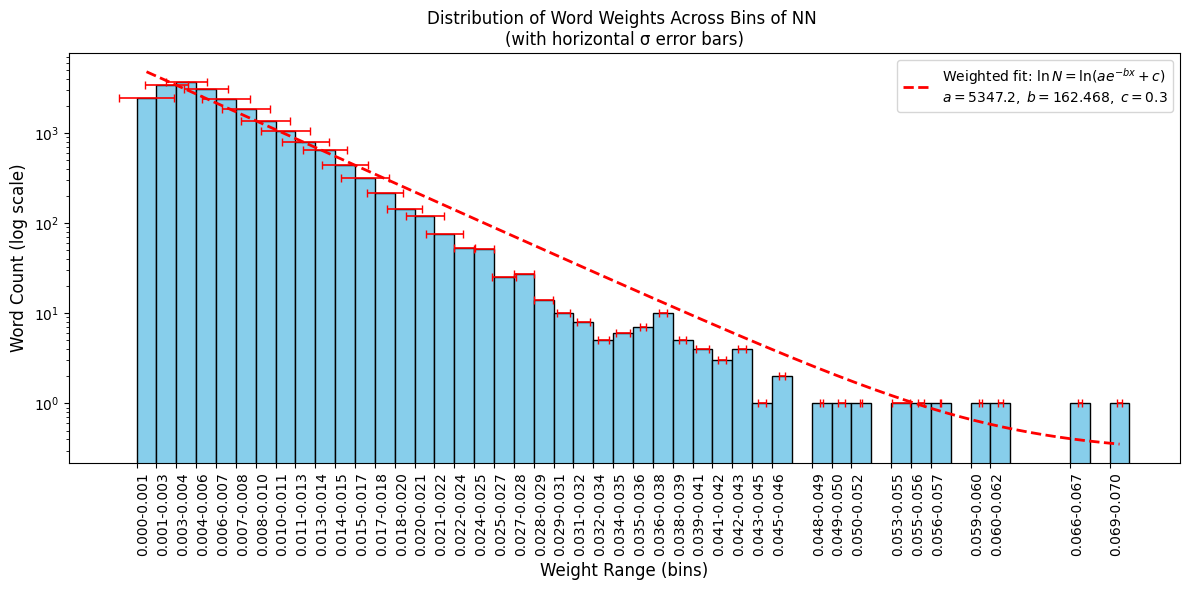

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1) Your bin data (as before)
data = {
    'bin_min': [0.0, 0.0014000000000000002, 0.0028000000000000004, 0.004200000000000001, 0.005600000000000001, 0.007000000000000001, 0.008400000000000001, 0.009800000000000001, 0.011200000000000002, 0.012600000000000002, 0.014000000000000002, 0.015400000000000002, 0.016800000000000002, 0.0182, 0.019600000000000003, 0.021000000000000005, 0.022400000000000003, 0.0238, 0.025200000000000004, 0.026600000000000006, 0.028000000000000004, 0.029400000000000003, 0.030800000000000004, 0.032200000000000006, 0.033600000000000005, 0.035, 0.0364, 0.03780000000000001, 0.039200000000000006, 0.040600000000000004, 0.04200000000000001, 0.04340000000000001, 0.044800000000000006, 0.046200000000000005, 0.0476, 0.04900000000000001, 0.05040000000000001, 0.051800000000000006, 0.05320000000000001, 0.05460000000000001, 0.05600000000000001, 0.05740000000000001, 0.058800000000000005, 0.06020000000000001, 0.06160000000000001, 0.06300000000000001, 0.06440000000000001, 0.06580000000000001, 0.06720000000000001, 0.06860000000000001]
,
    'bin_max': [0.0014000000000000002, 0.0028000000000000004, 0.004200000000000001, 0.005600000000000001, 0.007000000000000001, 0.008400000000000001, 0.009800000000000001, 0.011200000000000002, 0.012600000000000002, 0.014000000000000002, 0.015400000000000002, 0.016800000000000002, 0.0182, 0.019600000000000003, 0.021000000000000005, 0.022400000000000003, 0.0238, 0.025200000000000004, 0.026600000000000006, 0.028000000000000004, 0.029400000000000003, 0.030800000000000004, 0.032200000000000006, 0.033600000000000005, 0.035, 0.0364, 0.03780000000000001, 0.039200000000000006, 0.040600000000000004, 0.04200000000000001, 0.04340000000000001, 0.044800000000000006, 0.046200000000000005, 0.0476, 0.04900000000000001, 0.05040000000000001, 0.051800000000000006, 0.05320000000000001, 0.05460000000000001, 0.05600000000000001, 0.05740000000000001, 0.058800000000000005, 0.06020000000000001, 0.06160000000000001, 0.06300000000000001, 0.06440000000000001, 0.06580000000000001, 0.06720000000000001, 0.06860000000000001, 0.07]
,
    'count': [2429, 3375, 3718, 3051, 2410, 1852, 1360, 1047, 792, 639, 440, 314, 215, 142, 120, 76, 53, 52, 25, 27, 14, 10, 8, 5, 6, 7, 10, 5, 4, 3, 4, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1]
,
}
df = pd.DataFrame(data)

# 2) Filter out empty bins
df = df[df['count'] > 0].reset_index(drop=True)

# 3) Your per-bin standard deviations (in the same order as df)
std_devs = [0.0019330924548152707, 0.001527515688226402, 0.0014533827655343352, 0.001560111098750905, 0.0016784506786015267, 0.0017034249579811265, 0.0017209385264339648, 0.0017512389392511719, 0.0016738973454881645, 0.0015414737983658734, 0.001598197279892112, 0.0016816862935187754, 0.001249159717570175, 0.0012312618055486074, 0.0013391066673968384, 0.0013260269108962507, 0.0007233981739213797, 0.0006923760649998059, 0.0008414083431960965, 0.0006837370081371171, 0.000671714224949867, 0.00048398347079213347, 0.00043278170016764806, 0.00039089640571384176, 0.00048511167099270404, 0.00020880613017821144, 0.00026214499804497557, 0.00026442390209661454, 0.000442944691807002, 0.0002856571371417141, 0.00029933259094191555, 0.00027129319932501155, 0.00023409399821439257, 0.00010198039027185454, 0.00026076809620810646, 7.483314773547875e-05, 0.0006241794613730891, 0.00023323807579381348, 3.999999999999837e-05, 7.4833147735478e-05, 0.00014966629547095693, 0.00013564659966250597, 0.00017888543819998053]
  # length must == len(df)

# 4) Compute bar positions
bar_lefts  = df['bin_min']
bar_widths = df['bin_max'] - df['bin_min']
bar_counts = df['count']
bin_centers = bar_lefts + bar_widths / 2

# 5) Plot histogram
plt.figure(figsize=(12, 6))
plt.bar(bar_lefts, bar_counts,
        width=bar_widths, align='edge',
        log=True, color='skyblue', edgecolor='black')

# 6) Overlay horizontal error bars at each bar’s center
plt.errorbar(bin_centers, bar_counts,
             xerr=std_devs,
             fmt='none', ecolor='red', capsize=3, lw=1.2)

# 7) Ticks and labels
tick_labels = [f"{low:.3f}-{high:.3f}"
               for low, high in zip(df['bin_min'], df['bin_max'])]
plt.xticks(bar_lefts, tick_labels, rotation=90, ha='left')

plt.xlabel("Weight Range (bins)", fontsize=12)
plt.ylabel("Word Count (log scale)", fontsize=12)
plt.title("Distribution of Word Weights Across Bins of NN \n(with horizontal σ error bars)")
plt.tight_layout()
from scipy.optimize import curve_fit

# 1) Your exp+plateau model, and its log–wrapper
def exp_decay_with_plateau(x, a, b, c):
    return a * np.exp(-b * x) + c

def log_model(x, a, b, c):
    return np.log(exp_decay_with_plateau(x, a, b, c))

# 2) Data
x_data = bin_centers.values
y_data = df['count'].values
log_Y  = np.log(y_data)

# 3) Weights in log–space ~ 1 / σ_log, 
#    and for Poisson counts σ_N ≈ √N ⇒ σ_log ≈ 1/√N
sigma_log = 1.0/np.sqrt(y_data)

# 4) Initial guesses & nonnegativity bounds
p0 = [y_data.max(), 1.0/(x_data.mean()+1e-8), y_data.min()]
bounds = ([0,0,0], [np.inf,np.inf,np.inf])

# 5) Fit log_model(x) ≈ log_Y, weighted by 1/σ
popt, pcov = curve_fit(
    log_model, x_data, log_Y,
    p0=p0, bounds=bounds,
    sigma=sigma_log,
    absolute_sigma=False
)

# 6) Build the raw–space curve
x_fit = np.linspace(x_data.min(), x_data.max(), 500)
y_fit = exp_decay_with_plateau(x_fit, *popt)

# 7) Overlay on your log–y bar plot
plt.plot(
    x_fit, y_fit, 'r--', lw=2,
    label=(
      r'Weighted fit: $\ln N = \ln(ae^{-bx}+c)$' + '\n'
      fr'$a={popt[0]:.1f},\; b={popt[1]:.3f},\; c={popt[2]:.1f}$'
    )
)
plt.legend()
plt.tight_layout()
plt.show()



In [9]:
import numpy as np
import pandas as pd

def load_word_weights(path):
    """
    Reads a file whose contents look like
      'anymore': 0.0035, 'similar': 0.0047, 'potential': 0.0037, ...
    (possibly all on one line),
    and returns a dict {word: weight}.
    """
    text = open(path, "r", encoding="utf-8").read()
    # Split on commas to get each "'word': weight" piece
    pieces = [p.strip() for p in text.split(",") if p.strip()]
    
    out = {}
    for piece in pieces:
        # Remove any surrounding quotes and whitespace
        # Then split on ':' to separate word from weight
        if ":" not in piece:
            continue
        w, val = piece.split(":", 1)
        w = w.strip().strip("'\"")        # strip spaces and quotes
        weight = float(val.strip())       # parse the number
        out[w] = weight
    return out

def bin_word_weights_dict(word_weights, num_bins=10):
    """
    Takes dict {word: weight} and bins the weights into
    `num_bins` equal-width intervals, returning a DataFrame
    with columns ['bin_min','bin_max','count','avg_weight'].
    """
    weights = np.array(list(word_weights.values()), dtype=float)
    wmin, wmax = weights.min(), weights.max()
    bins = np.linspace(wmin, wmax, num_bins + 1)
    
    idx = np.digitize(weights, bins) - 1
    idx = np.clip(idx, 0, num_bins - 1)
    
    counts = np.bincount(idx, minlength=num_bins)
    avg_wts = [
        weights[idx == k].mean() if counts[k] > 0 else np.nan
        for k in range(num_bins)
    ]
    
    ranges = [(bins[i], bins[i+1]) for i in range(num_bins)]
    df = pd.DataFrame({
        'bin_min':    [low for low, _ in ranges],
        'bin_max':    [high for _, high in ranges],
        'count':      counts,
        'avg_weight': avg_wts
    })
    return df

# === Usage ===
word_weights = load_word_weights("variance_QCNN.csv")
df_bins = bin_word_weights_dict(word_weights, num_bins=50)

# Print all bins, including empty ones:
for col in df_bins.columns:
    print(f"Column: {col}")
    print(df_bins[col].to_list())
    print()  # blank line for separation



Column: bin_min
[0.0188, 0.034278, 0.049755999999999995, 0.065234, 0.08071199999999999, 0.09618999999999998, 0.11166799999999999, 0.127146, 0.142624, 0.158102, 0.17357999999999998, 0.189058, 0.204536, 0.220014, 0.235492, 0.25096999999999997, 0.26644799999999996, 0.28192599999999995, 0.29740399999999995, 0.31288199999999994, 0.32835999999999993, 0.343838, 0.35931599999999997, 0.37479399999999996, 0.39027199999999995, 0.40574999999999994, 0.42122799999999994, 0.4367059999999999, 0.452184, 0.46766199999999997, 0.48313999999999996, 0.49861799999999995, 0.514096, 0.529574, 0.545052, 0.56053, 0.576008, 0.591486, 0.606964, 0.6224419999999999, 0.6379199999999999, 0.653398, 0.668876, 0.684354, 0.699832, 0.71531, 0.730788, 0.746266, 0.761744, 0.777222]

Column: bin_max
[0.034278, 0.049755999999999995, 0.065234, 0.08071199999999999, 0.09618999999999998, 0.11166799999999999, 0.127146, 0.142624, 0.158102, 0.17357999999999998, 0.189058, 0.204536, 0.220014, 0.235492, 0.25096999999999997, 0.2664479999

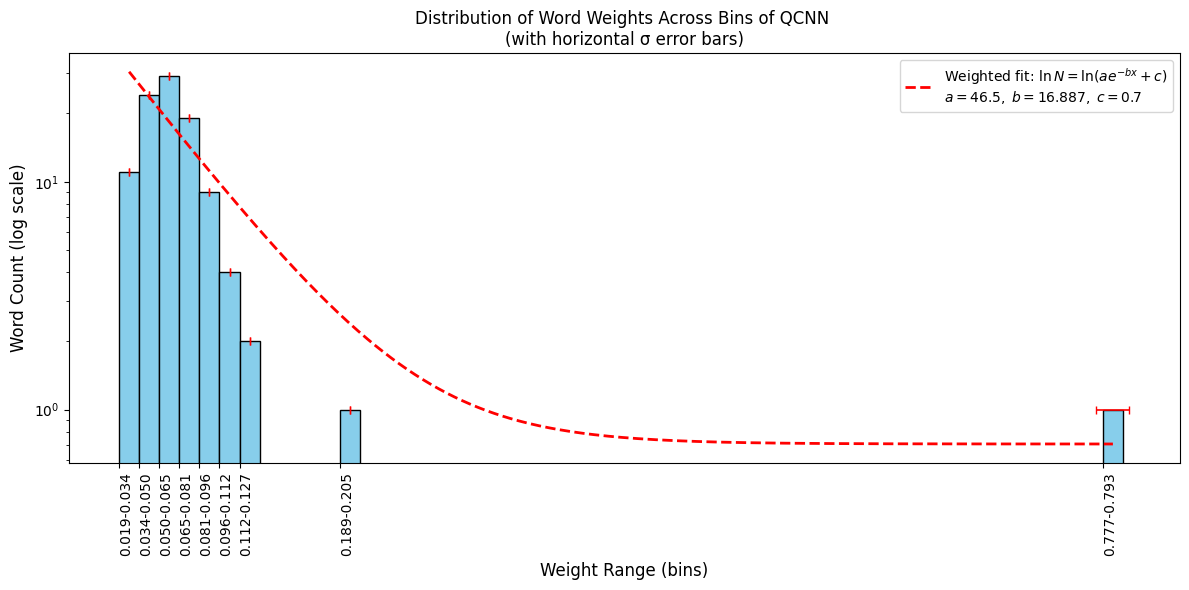

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Complete bin data
data = {
    'bin_min': [0.0188, 0.034278, 0.049755999999999995, 0.065234, 0.08071199999999999, 0.09618999999999998, 0.11166799999999999, 0.127146, 0.142624, 0.158102, 0.17357999999999998, 0.189058, 0.204536, 0.220014, 0.235492, 0.25096999999999997, 0.26644799999999996, 0.28192599999999995, 0.29740399999999995, 0.31288199999999994, 0.32835999999999993, 0.343838, 0.35931599999999997, 0.37479399999999996, 0.39027199999999995, 0.40574999999999994, 0.42122799999999994, 0.4367059999999999, 0.452184, 0.46766199999999997, 0.48313999999999996, 0.49861799999999995, 0.514096, 0.529574, 0.545052, 0.56053, 0.576008, 0.591486, 0.606964, 0.6224419999999999, 0.6379199999999999, 0.653398, 0.668876, 0.684354, 0.699832, 0.71531, 0.730788, 0.746266, 0.761744, 0.777222]
,
    'bin_max': [0.034278, 0.049755999999999995, 0.065234, 0.08071199999999999, 0.09618999999999998, 0.11166799999999999, 0.127146, 0.142624, 0.158102, 0.17357999999999998, 0.189058, 0.204536, 0.220014, 0.235492, 0.25096999999999997, 0.26644799999999996, 0.28192599999999995, 0.29740399999999995, 0.31288199999999994, 0.32835999999999993, 0.343838, 0.35931599999999997, 0.37479399999999996, 0.39027199999999995, 0.40574999999999994, 0.42122799999999994, 0.4367059999999999, 0.452184, 0.46766199999999997, 0.48313999999999996, 0.49861799999999995, 0.514096, 0.529574, 0.545052, 0.56053, 0.576008, 0.591486, 0.606964, 0.6224419999999999, 0.6379199999999999, 0.653398, 0.668876, 0.684354, 0.699832, 0.71531, 0.730788, 0.746266, 0.761744, 0.777222, 0.7927]
,
    'count': [11, 24, 29, 19, 9, 4, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
,

    'std_devs': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0018605375567292376, 0.0, 0.0, 0.009342719090286297, 0.005551720454057461, 0.004227718060609056, 0.003179056463795508, 0.0032914434523473126, 0.00667337995321711, 0.006659429404986587, 0.009455453452902194, 0.006088480927127883, 0.011963444320094442, 0.004493728963789426, 0.0, 0.006657783414921215, 0.006387592138931018, 0.0027539547321382505, 0.006018737409124941, 0.004395452195167182, 0.009613844184300056, 0.0, 0.007724005869150195, 0.004663689526544407, 0.008183153426399874, 0.00717244728108893, 0.004242326405798278, 0.005993930263191257, 0.008828463059898931, 0.01943164429480943, 0.01817469302812751, 0.00355501523672309, 0.004895222160433577, 0.006355700853039995, 0.0047035589362382476, 0.012783364189445595]
,
}

df = pd.DataFrame(data)

# 2) Filter out empty bins
df = df[df['count'] > 0].reset_index(drop=True)

# 3) Your per-bin standard deviations (in the same order as df)


  # length must == len(df)

# 4) Compute bar positions
bar_lefts  = df['bin_min']
bar_widths = df['bin_max'] - df['bin_min']
bar_counts = df['count']
bin_centers = bar_lefts + bar_widths / 2

# 5) Plot histogram
plt.figure(figsize=(12, 6))
plt.bar(bar_lefts, bar_counts,
        width=bar_widths, align='edge',
        log=True, color='skyblue', edgecolor='black')

# 6) Overlay horizontal error bars at each bar’s center
plt.errorbar(bin_centers, bar_counts,
             xerr=df['std_devs'],
             fmt='none', ecolor='red', capsize=3, lw=1.2)

# 7) Ticks and labels
tick_labels = [f"{low:.3f}-{high:.3f}"
               for low, high in zip(df['bin_min'], df['bin_max'])]
plt.xticks(bar_lefts, tick_labels, rotation=90, ha='left')

plt.xlabel("Weight Range (bins)", fontsize=12)
plt.ylabel("Word Count (log scale)", fontsize=12)
plt.title("Distribution of Word Weights Across Bins of QCNN \n(with horizontal σ error bars)")
plt.tight_layout()

from scipy.optimize import curve_fit

# 1) Your exp+plateau model, and its log–wrapper
def exp_decay_with_plateau(x, a, b, c):
    return a * np.exp(-b * x) + c

def log_model(x, a, b, c):
    return np.log(exp_decay_with_plateau(x, a, b, c))

# 2) Data
x_data = bin_centers.values
y_data = df['count'].values
log_Y  = np.log(y_data)

# 3) Weights in log–space ~ 1 / σ_log, 
#    and for Poisson counts σ_N ≈ √N ⇒ σ_log ≈ 1/√N
sigma_log = 1.0/np.sqrt(y_data)

# 4) Initial guesses & nonnegativity bounds
p0 = [y_data.max(), 1.0/(x_data.mean()+1e-8), y_data.min()]
bounds = ([0,0,0], [np.inf,np.inf,np.inf])

# 5) Fit log_model(x) ≈ log_Y, weighted by 1/σ
popt, pcov = curve_fit(
    log_model, x_data, log_Y,
    p0=p0, bounds=bounds,
    sigma=sigma_log,
    absolute_sigma=False
)

# 6) Build the raw–space curve
x_fit = np.linspace(x_data.min(), x_data.max(), 500)
y_fit = exp_decay_with_plateau(x_fit, *popt)

# 7) Overlay on your log–y bar plot
plt.plot(
    x_fit, y_fit, 'r--', lw=2,
    label=(
      r'Weighted fit: $\ln N = \ln(ae^{-bx}+c)$' + '\n'
      fr'$a={popt[0]:.1f},\; b={popt[1]:.3f},\; c={popt[2]:.1f}$'
    )
)
plt.legend()
plt.tight_layout()
plt.show()


